In [17]:
import scipy.stats as sts
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [222]:
def plot_ecdf_simple(data):
    plt.plot(np.sort(data),np.linspace(0,1,len(data), endpoint=False))

In [208]:
def ecdf(x, data):
    return sum(map(lambda r: r <= x, data)) / len(data)

In [209]:
def epsilon_n(n, alpha=0.05):
    return np.sqrt(1 / (2 * n) * np.log(2 / alpha))

In [210]:
def l(x, data):
    eps_n = epsilon_n(len(data))
    return np.max([ecdf(x, data) - eps_n, 0]) 

In [211]:
def u(x, data):
    eps_n = epsilon_n(len(data))
    return np.min([ecdf(x, data) + eps_n, 1])

In [237]:
def plot_ecdf_with_ci(data, dist, alpha=.05):
    data_sorted = np.sort(data)
    
    L = [l(x, data) for x in data_sorted]
    U = [u(x, data) for x in data_sorted]
    ecdf_imgs = [ecdf(x, data) for x in data_sorted]
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(data_sorted, ecdf_imgs, label="ecdf")
    if dist is not None:
        ax.plot(data_sorted, [dist.cdf(x) for x in data_sorted], color='lightgreen', label="cdf")
    ax.fill_between(data_sorted, L, U, color='b', alpha=.1, label="95% confidence")
    ax.legend(loc=4, prop={'size': 15})
    plt.grid()

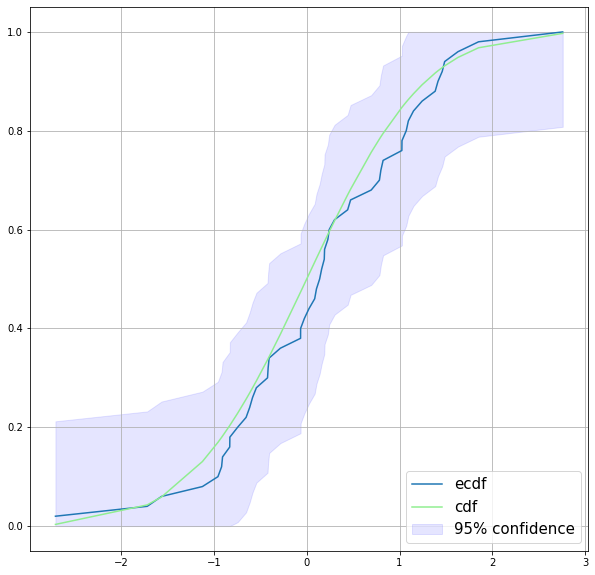

In [232]:
plot_ecdf_with_ci(sts.norm.rvs(size=50), sts.norm)

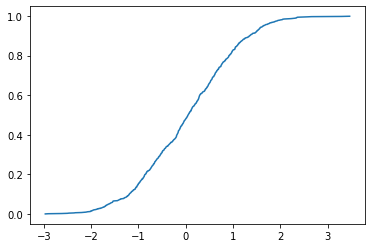

In [225]:
plot_ecdf_simple(sts.norm.rvs(size=1000))

# Exercises

In [233]:
# Chapter 7 -- Ex. 3 

n = 100 
rounds = 100
acc = 0
for i in range(rounds):
    xs = sts.norm.rvs(size=n)
    c = [(sts.norm.cdf(x) >= l(x, xs)) & (sts.norm.cdf(x) <= u(x, xs)) for x in xs]
    if np.all(c):
        acc += 1 
acc/rounds

0.94

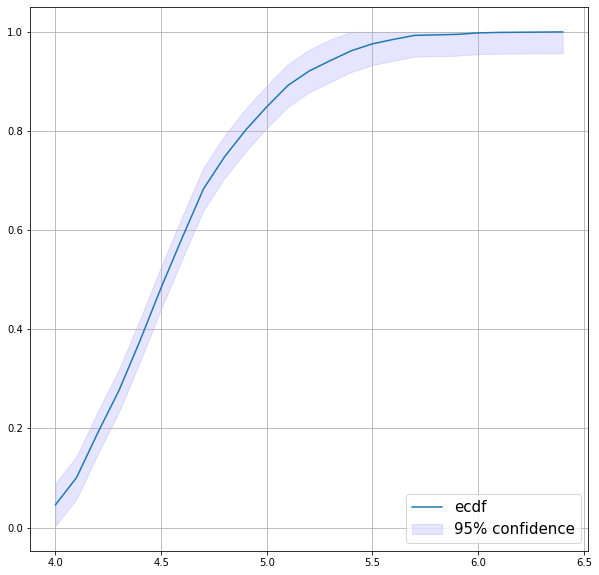

In [241]:
# Chapter 7 -- Ex. 7 
fiji_df = pd.read_csv('./../data/fijiquakes.dat', delim_whitespace=True)
fiji_df.head(5)
plot_ecdf_with_ci(fiji_df["mag"], None)

(array([191., 186., 306., 119.,  90.,  70.,  23.,  10.,   4.,   1.]),
 array([4.  , 4.24, 4.48, 4.72, 4.96, 5.2 , 5.44, 5.68, 5.92, 6.16, 6.4 ]),
 <BarContainer object of 10 artists>)

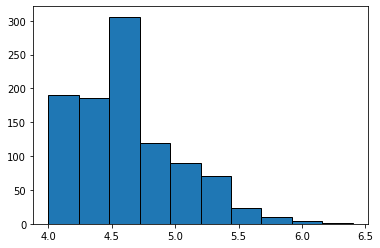

In [243]:
plt.hist(fiji_df["mag"], ec="black")

In [249]:
# Estimate F(4.9) - F(4.3)
ecdf(4.9, fiji_df["mag"]) - ecdf(4.3, fiji_df["mag"])

0.526

In [261]:
# Construct a 95% confidence interval for estimate of F(4.9) - F(4.3)
sts.norm.ppf(.975)


1.959963984540054

0.975